<a href="https://colab.research.google.com/github/Latamila/Latamila/blob/main/analisepreditiva_uni.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()

In [3]:
from google.colab import files


In [ ]:
datas = pd.date_range('1/1/2022', periods = 50, freq = 'W')
datas

DatetimeIndex(['2022-01-02', '2022-01-09', '2022-01-16', '2022-01-23',
               '2022-01-30', '2022-02-06', '2022-02-13', '2022-02-20',
               '2022-02-27', '2022-03-06', '2022-03-13', '2022-03-20',
               '2022-03-27', '2022-04-03', '2022-04-10', '2022-04-17',
               '2022-04-24', '2022-05-01', '2022-05-08', '2022-05-15',
               '2022-05-22', '2022-05-29', '2022-06-05', '2022-06-12',
               '2022-06-19', '2022-06-26', '2022-07-03', '2022-07-10',
               '2022-07-17', '2022-07-24', '2022-07-31', '2022-08-07',
               '2022-08-14', '2022-08-21', '2022-08-28', '2022-09-04',
               '2022-09-11', '2022-09-18', '2022-09-25', '2022-10-02',
               '2022-10-09', '2022-10-16', '2022-10-23', '2022-10-30',
               '2022-11-06', '2022-11-13', '2022-11-20', '2022-11-27',
               '2022-12-04', '2022-12-11'],
              dtype='datetime64[ns]', freq='W-SUN')

Parâmetro Descrição
B Dias úteis
D Diária (default).
W Semanal
M Mensal
SM Quinzenal
BM Mensal, informando o último dia útil 
do mês
MS Mensal, começando no primeiro dia 
do mês
A Anual
H Por hora
T Por minuto
S Por segundo
L Por milissegundo.

In [ ]:
st = pd.Series(np.random.randint(0,100, len(datas)), index = datas)
st


2022-01-02     7
2022-01-09    84
2022-01-16    53
2022-01-23    78
2022-01-30    47
2022-02-06    69
2022-02-13    54
2022-02-20    51
2022-02-27    70
2022-03-06    43
2022-03-13    93
2022-03-20    39
2022-03-27    78
2022-04-03    91
2022-04-10    58
2022-04-17    67
2022-04-24    64
2022-05-01    77
2022-05-08    38
2022-05-15    37
2022-05-22    80
2022-05-29    39
2022-06-05    87
2022-06-12    31
2022-06-19    78
2022-06-26    94
2022-07-03    18
2022-07-10    66
2022-07-17    19
2022-07-24    86
2022-07-31    53
2022-08-07    94
2022-08-14     7
2022-08-21     1
2022-08-28    52
2022-09-04    90
2022-09-11     6
2022-09-18    95
2022-09-25     8
2022-10-02     8
2022-10-09     0
2022-10-16    37
2022-10-23    70
2022-10-30    55
2022-11-06    22
2022-11-13    32
2022-11-20    10
2022-11-27     0
2022-12-04    20
2022-12-11    58
Freq: W-SUN, dtype: int64

<AxesSubplot:>

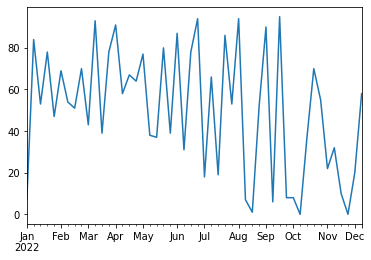

In [ ]:
st.plot()

In [ ]:
uploaded = files.upload()

Saving sono.csv to sono.csv


In [ ]:
sono_df = pd.read_csv('sono.csv')

In [ ]:
sono_df.head()

,nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
0,Breno,Recife,Brasil,12.1,NaN,11.9,50
1,Monica,Fortaleza,Brasil,17.0,NaN,7.0,72
2,Tiago,Goiania,Brasil,14.4,NaN,9.6,63
3,Fernando,Curitiba,Brasil,14.9,0.133333,9.1,67
4,Matias,Recife,Brasil,4.0,0.666667,20.0,49


In [ ]:
sono_df['cidade'].unique()

array(['Recife', 'Fortaleza', 'Goiania', 'Curitiba', 'Rio de Janeiro',
       'Porto Alegre', 'Capri', 'Blumenau', 'Buenos Aires', 'Maceio',
       'Belo Horizonte'], dtype=object)

In [ ]:
sono_df['cidade'].value_counts()

Buenos Aires      6
Maceio            5
Recife            4
Porto Alegre      3
Blumenau          3
Goiania           2
Curitiba          2
Belo Horizonte    2
Fortaleza         1
Rio de Janeiro    1
Capri             1
Name: cidade, dtype: int64

E se quisermos saber a proporção, o percentual de participação de cada uma das 
cidades? Essa informação pode ser útil para compararmos percentuais. Preste 
atenção na Figura 8! O comando é praticamente o mesmo, apenas incluímos o 
parâmetro “normalize = True” no método “value_counts”.

In [ ]:
sono_df['cidade'].value_counts(normalize= True)

Buenos Aires      0.200000
Maceio            0.166667
Recife            0.133333
Porto Alegre      0.100000
Blumenau          0.100000
Goiania           0.066667
Curitiba          0.066667
Belo Horizonte    0.066667
Fortaleza         0.033333
Rio de Janeiro    0.033333
Capri             0.033333
Name: cidade, dtype: float64

In [ ]:
sono_df.sample(10)

,nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
10,Tamires,Capri,Brasil,5.3,NaN,18.7,56
27,Larissa,Belo Horizonte,Brasil,12.5,0.416667,11.5,58
26,Lais,Belo Horizonte,Brasil,14.9,NaN,9.1,96
5,Carlos,Recife,Brasil,14.4,0.766667,9.6,56
17,Leonardo,Maceio,Brasil,17.4,0.383333,6.6,70
14,Abel,Buenos Aires,Argentina,10.3,NaN,13.7,66
19,Sandro,Maceio,Brasil,18.0,0.333333,6.0,78
29,Galago,Buenos Aires,Argentina,9.8,0.550000,14.2,71
25,Norma,Goiania,Brasil,10.9,NaN,13.1,90
6,Josias,Rio de Janeiro,Brasil,8.7,0.383333,15.3,58


In [ ]:
sono_df['cidade']

0             Recife
1          Fortaleza
2            Goiania
3           Curitiba
4             Recife
5             Recife
6     Rio de Janeiro
7       Porto Alegre
8       Porto Alegre
9       Porto Alegre
10             Capri
11          Blumenau
12          Blumenau
13          Blumenau
14      Buenos Aires
15      Buenos Aires
16            Maceio
17            Maceio
18      Buenos Aires
19            Maceio
20            Maceio
21            Maceio
22          Curitiba
23      Buenos Aires
24            Recife
25           Goiania
26    Belo Horizonte
27    Belo Horizonte
28      Buenos Aires
29      Buenos Aires
Name: cidade, dtype: object

In [ ]:
sono_df[['cidade','pais']]
#o comando correto para selecionar as colunas cidade e país

,cidade,pais
0,Recife,Brasil
1,Fortaleza,Brasil
2,Goiania,Brasil
3,Curitiba,Brasil
4,Recife,Brasil
5,Recife,Brasil
6,Rio de Janeiro,Brasil
7,Porto Alegre,Brasil
8,Porto Alegre,Brasil
9,Porto Alegre,Brasil


In [ ]:
sono_df[sono_df['cidade']=='Blumenau']

,nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
11,Natacha,Blumenau,Brasil,9.4,0.216667,14.6,62
12,Flavio,Blumenau,Brasil,10.0,NaN,14.0,69
13,Natalia,Blumenau,Brasil,12.5,0.116667,11.5,67


In [ ]:
sono_df['cidade']=='Blumenau'

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
Name: cidade, dtype: bool

In [ ]:
sono_df[(sono_df['cidade']=='Blumenau') & (sono_df['peso']>65)]

,nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
12,Flavio,Blumenau,Brasil,10.0,NaN,14.0,69
13,Natalia,Blumenau,Brasil,12.5,0.116667,11.5,67


In [ ]:
resultado_df = sono_df[(sono_df['cidade'] == 'Blumenau') & (sono_df['peso']>65)]

In [ ]:
resultado_df

,nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
12,Flavio,Blumenau,Brasil,10.0,NaN,14.0,69
13,Natalia,Blumenau,Brasil,12.5,0.116667,11.5,67


In [ ]:
sono_df[sono_df['cidade'].isin(['Blumenau','Buenos Aires'])].sort_values(by='nome')

,nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
14,Abel,Buenos Aires,Argentina,10.3,NaN,13.7,66
23,Abelardo,Buenos Aires,Argentina,3.1,NaN,20.9,102
15,Abilio,Buenos Aires,Argentina,8.3,NaN,15.7,59
12,Flavio,Blumenau,Brasil,10.0,NaN,14.0,69
29,Galago,Buenos Aires,Argentina,9.8,0.550000,14.2,71
28,Narelle,Buenos Aires,Argentina,9.8,0.550000,14.2,59
11,Natacha,Blumenau,Brasil,9.4,0.216667,14.6,62
13,Natalia,Blumenau,Brasil,12.5,0.116667,11.5,67
18,Rodolfo,Buenos Aires,Argentina,5.3,NaN,18.7,72


A etapa de limpeza e transformação dos 
dados é fundamental para organizar os dados que 
serão lidos pelo algoritmo. Um dos problemas mais 
comuns quando lidamos com conjunto de dados são 
os valores nulos ou NaN (Not a Number).

In [ ]:
sono_df[sono_df['sono_ciclo'].isnull()]

,nome,cidade,pais,sono_total,sono_ciclo,sono_indice,peso
0,Breno,Recife,Brasil,12.1,NaN,11.9,50
1,Monica,Fortaleza,Brasil,17.0,NaN,7.0,72
2,Tiago,Goiania,Brasil,14.4,NaN,9.6,63
7,Marta,Porto Alegre,Brasil,7.0,NaN,17.0,90
9,Keyla,Porto Alegre,Brasil,3.0,NaN,21.0,95
10,Tamires,Capri,Brasil,5.3,NaN,18.7,56
12,Flavio,Blumenau,Brasil,10.0,NaN,14.0,69
14,Abel,Buenos Aires,Argentina,10.3,NaN,13.7,66
15,Abilio,Buenos Aires,Argentina,8.3,NaN,15.7,59
18,Rodolfo,Buenos Aires,Argentina,5.3,NaN,18.7,72


In [ ]:
sono_df['sono_ciclo'].isna().sum()

14

Assim, se quisermos saber quantas linhas 
de cada uma das colunas possui valores nulos, podemos apenas tirar a referência 
da coluna e usar o método diretamente no dataframe 

In [ ]:
sono_df.isna().sum()

nome            0
cidade          0
pais            0
sono_total      0
sono_ciclo     14
sono_indice     0
peso            0
dtype: int64

 Fazemos uma seleção de linhas e colunas em um único comando

In [ ]:
sono_df.query('cidade=="Blumenau" | pais=="Argentina"')[['sono_total','peso']]

,sono_total,peso
11,9.4,62
12,10.0,69
13,12.5,67
14,10.3,66
15,8.3,59
18,5.3,72
23,3.1,102
28,9.8,59
29,9.8,71


In [ ]:
sono_df['sono_total'].mean()

10.293333333333333

In [ ]:
sono_df['sono_total'].agg(['mean','min','max','count'])

mean     10.293333
min       2.900000
max      19.700000
count    30.000000
Name: sono_total, dtype: float64

In [ ]:
sono_df.groupby('cidade')['sono_total'].agg(['mean','min','max','count'])

,mean,min,max,count
cidade,,,,
Belo Horizonte,13.700000,12.5,14.9,2
Blumenau,10.633333,9.4,12.5,3
Buenos Aires,7.766667,3.1,10.3,6
Capri,5.300000,5.3,5.3,1
Curitiba,8.900000,2.9,14.9,2
Fortaleza,17.000000,17.0,17.0,1
Goiania,12.650000,10.9,14.4,2
Maceio,13.620000,3.9,19.7,5
Porto Alegre,6.700000,3.0,10.1,3


<AxesSubplot:xlabel='peso', ylabel='Count'>

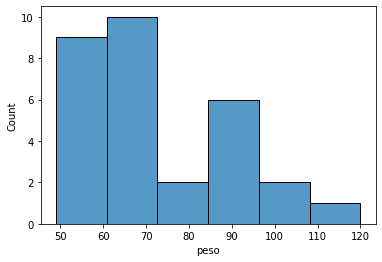

In [ ]:
sns.histplot(data = sono_df, x = 'peso')

O Scikit-Learn é uma biblioteca para análise de dados de código aberto 
(open source) e o padrão para aprendizado de máquina no ecossistema Python. Quando começarmos a estudar os algoritmos para construção de modelos 
preditivos, faremos uso dessa biblioteca. Trataremos, principalmente, de modelos 
de regressão, classificação e clusterização. Fique tranquilo(a)! Também, abordaremos, em detalhes, esses algoritmos e o passo a passo das construções desses 
modelos ao usar o Scikit-Learn

Você percebeu que, para nos comunicarmos com o computador de forma 
eficiente e produtiva, a escolha da linguagem de programação é fundamental. 
Essa escolha está diretamente relacionada com a solução que construiremos para 
resolver nosso problema de negócio. Optar por linguagens que forneçam bibliotecas específicas para manipulação de dados é bastante importante quando estamos 
construindo modelos preditivos

**REGRESSAO**

. A regressão 
é um processo para encontrar as correlações entre variáveis alvos e variáveis 
explicativas (GIOLO, 2014), sempre com o objetivo de prever variáveis contínuas, 
como previsão de tendências de mercado, previsão de preços de casas etc.

In [5]:
uploaded = files.upload()

Saving vendas_un.csv to vendas_un.csv


In [6]:
casas = pd.read_csv('vendas_un.csv')

In [7]:
casas.head()

,Valor,Area,Banheiros,Quartos,TamanhoLote,Tempo,Lareira
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1
3,138297,1800,1.0,2,0.48,49,1
4,129470,2088,1.0,3,1.84,29,1


In [8]:
casas.shape

(1047, 7)

In [9]:
casas.isnull().sum()

Valor          0
Area           0
Banheiros      0
Quartos        0
TamanhoLote    0
Tempo          0
Lareira        0
dtype: int64

In [10]:
casas['Valor'].describe()

count      1047.000000
mean     163862.125119
std       67651.558917
min       16858.000000
25%      112014.000000
50%      151917.000000
75%      205235.000000
max      446436.000000
Name: Valor, dtype: float64

Agora, sabemos que o menor valor 
de uma casa vendida foi de 16.858,00, e o maior valor, de 446.436,00. A 
média dos valores no conjunto de dados é de 163.862,12. O

<Axes: ylabel='Valor'>

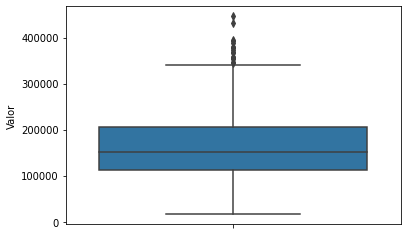

In [11]:
sns.boxplot(y=casas['Valor'])

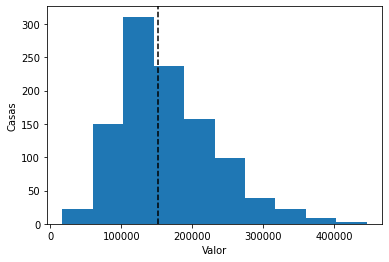

In [12]:
plt.hist(casas['Valor'])
plt.xlabel('Valor')
plt.ylabel('Casas')
plt.axvline(casas['Valor'].median(), color='k', linestyle='dashed')

In [13]:

print("AREA")
casas['Area'].describe()

AREA


count    1047.000000
mean     1807.302770
std       641.460916
min       672.000000
25%      1336.000000
50%      1672.000000
75%      2206.000000
max      4534.000000
Name: Area, dtype: float64

<Axes: ylabel='Area'>

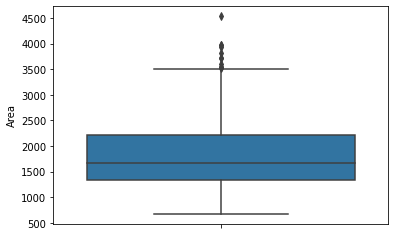

In [14]:
sns.boxplot(y=casas['Area'])

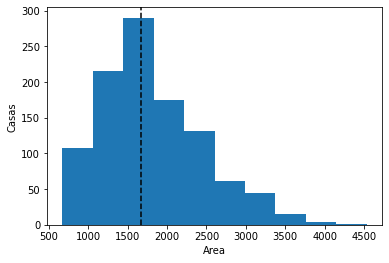

In [15]:
plt.hist(casas['Area'])
plt.xlabel('Area')
plt.ylabel('Casas')
plt.axvline(casas['Area'].median(), color='k', linestyle='dashed')

In [16]:
print("BANHEIROS")
casas['Banheiros'].describe()


BANHEIROS


count    1047.000000
mean        1.918338
std         0.641735
min         1.000000
25%         1.500000
50%         2.000000
75%         2.500000
max         4.500000
Name: Banheiros, dtype: float64

<Axes: ylabel='Banheiros'>

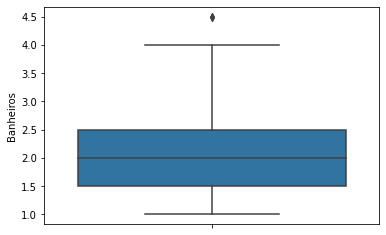

In [17]:
sns.boxplot(y=casas['Banheiros'])

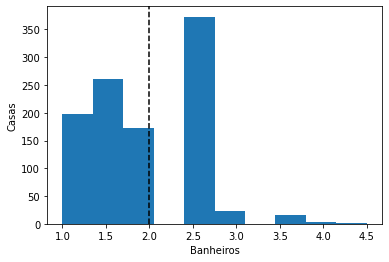

In [18]:
plt.hist(casas['Banheiros'])
plt.xlabel('Banheiros')
plt.ylabel('Casas')
plt.axvline(casas['Banheiros'].median(), color='k', linestyle='dashed')

In [19]:

print("QUARTOS")
casas['Quartos'].describe()

QUARTOS


count    1047.000000
mean        3.183381
std         0.750265
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         6.000000
Name: Quartos, dtype: float64

<Axes: ylabel='Quartos'>

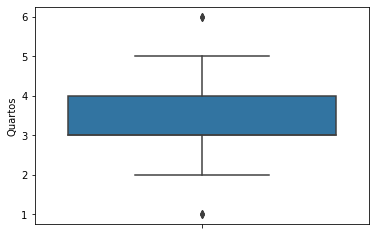

In [20]:
sns.boxplot(y=casas['Quartos'])

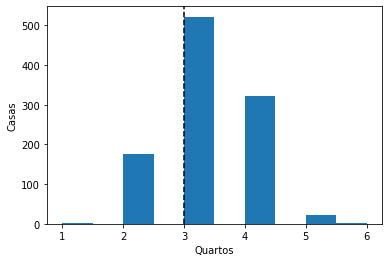

In [21]:
plt.hist(casas['Quartos'])
plt.xlabel('Quartos')
plt.ylabel('Casas')
plt.axvline(casas['Quartos'].median(), color='k', linestyle='dashed')

In [22]:
print('TAMANHO DO LOTE')
casas['TamanhoLote'].describe()

TAMANHO DO LOTE


count    1047.000000
mean        0.569580
std         0.777879
min         0.000000
25%         0.210000
50%         0.390000
75%         0.600000
max         9.000000
Name: TamanhoLote, dtype: float64

<Axes: ylabel='TamanhoLote'>

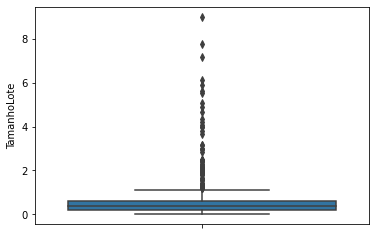

In [23]:
sns.boxplot(y=casas['TamanhoLote'])

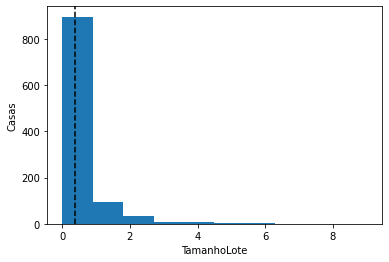

In [24]:
plt.hist(casas['TamanhoLote'])
plt.xlabel('TamanhoLote')
plt.ylabel('Casas')
plt.axvline(casas['TamanhoLote'].median(), color='k', linestyle='dashed')

In [25]:
print('TEMPO')
casas['Tempo'].describe()

TEMPO


count    1047.000000
mean       28.061127
std        34.900899
min         0.000000
25%         6.000000
50%        18.000000
75%        34.000000
max       247.000000
Name: Tempo, dtype: float64

<Axes: ylabel='Tempo'>

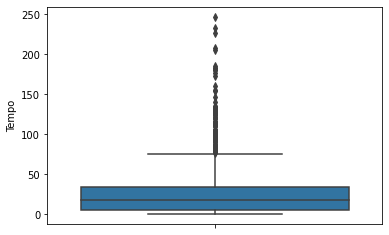

In [26]:
sns.boxplot(y=casas['Tempo'])

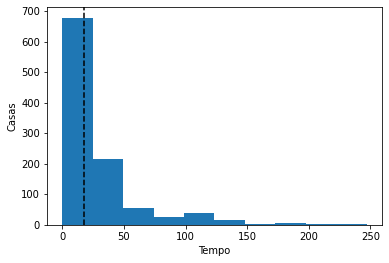

In [27]:
plt.hist(casas['Tempo'])
plt.xlabel('Tempo')
plt.ylabel('Casas')
plt.axvline(casas['Tempo'].median(), color='k', linestyle='dashed')

In [28]:
print('LAREIRA')
casas['Lareira'].describe()

LAREIRA


count    1047.000000
mean        0.593123
std         0.491486
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Lareira, dtype: float64

<Axes: ylabel='Lareira'>

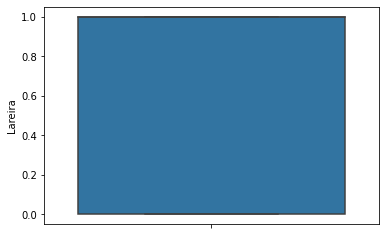

In [29]:
sns.boxplot(y=casas['Lareira'])

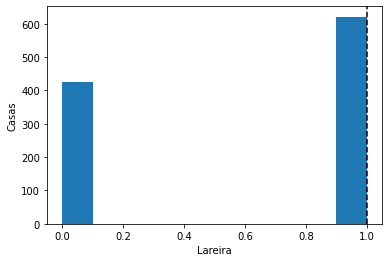

In [30]:
plt.hist(casas['Lareira'])
plt.xlabel('Lareira')
plt.ylabel('Casas')
plt.axvline(casas['Lareira'].median(), color='k', linestyle='dashed')

In [31]:
casas['Lareira'].value_counts()

1    621
0    426
Name: Lareira, dtype: int64

In [32]:
casas['Lareira'].value_counts(normalize = True)

1    0.593123
0    0.406877
Name: Lareira, dtype: float64

<Axes: xlabel='Lareira', ylabel='count'>

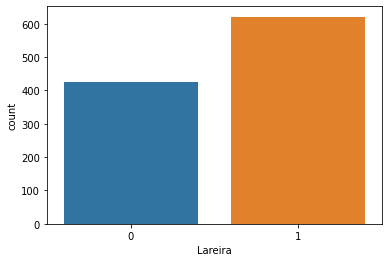

In [33]:
sns.countplot(x= 'Lareira', data=casas)

In [35]:
casas['Valor'].corr(casas['Area'])

0.7763964501037223

In [ ]:
casas['Valor'].corr(casas['Banheiros'])


0.6701894464310537

In [ ]:
casas['Valor'].corr(casas['TamanhoLote'])

0.15528413219048626

In [ ]:
casas['Valor'].corr(casas['Quartos'])

0.4710743438160162

In [ ]:
casas['Valor'].corr(casas['Lareira'])

0.4602369976369495

In [36]:
casas.corr()

,Valor,Area,Banheiros,Quartos,TamanhoLote,Tempo,Lareira
Valor,1.000000,0.776396,0.670189,0.471074,0.155284,-0.363354,0.460237
Area,0.776396,1.000000,0.722649,0.664347,0.200180,-0.263168,0.481436
Banheiros,0.670189,0.722649,1.000000,0.491798,0.100993,-0.443830,0.444700
Quartos,0.471074,0.664347,0.491798,1.000000,0.140682,-0.060598,0.295873
TamanhoLote,0.155284,0.200180,0.100993,0.140682,1.000000,0.015135,0.052765
Tempo,-0.363354,-0.263168,-0.443830,-0.060598,0.015135,1.000000,-0.248794
Lareira,0.460237,0.481436,0.444700,0.295873,0.052765,-0.248794,1.000000


<Axes: xlabel='Quartos', ylabel='Valor'>

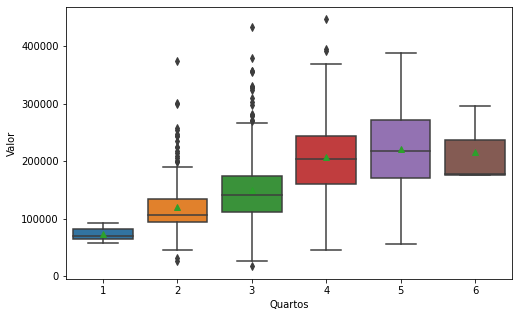

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(x=casas['Quartos'], y=casas['Valor'], showmeans = True)

In [38]:
from sklearn import linear_model

In [46]:
variavel_explicativa = casas['Area']

In [47]:
alvo= casas['Valor']

In [48]:
from sklearn import linear_model

In [49]:
from sklearn.linear_model import LinearRegression
modelo = LinearRegression()


In [51]:
casas.head()

,Valor,Area,Banheiros,Quartos,TamanhoLote,Tempo,Lareira
0,142212,1982,1.0,3,2.00,133,0
1,134865,1676,1.5,3,0.38,14,1
2,118007,1694,2.0,3,0.96,15,1
3,138297,1800,1.0,2,0.48,49,1
4,129470,2088,1.0,3,1.84,29,1


In [52]:
variavel_explicativa = casas.iloc[:,1:7]

In [53]:
alvo= casas.iloc[:,0]

In [54]:
alvo

0       142212
1       134865
2       118007
3       138297
4       129470
         ...  
1042    107695
1043    236737
1044    154829
1045    179492
1046    189108
Name: Valor, Length: 1047, dtype: int64

In [55]:
modelo = LinearRegression()

In [56]:
modelo.fit(variavel_explicativa, alvo)

LinearRegression()

In [57]:
modelo.score(variavel_explicativa, alvo)

0.6467927124373796

In [58]:
teste = (casas.iloc[1:2,1:7])
teste = teste.append(casas.iloc[4:5,1:7])
teste

<ipython-input-58-bc86de499743>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  teste = teste.append(casas.iloc[4:5,1:7])


,Area,Banheiros,Quartos,TamanhoLote,Tempo,Lareira
1,1676,1.5,3,0.38,14,1
4,2088,1.0,3,1.84,29,1


In [59]:
modelo.predict(teste)

array([156065.93309261, 174384.12571247])

In [60]:
casas['Valor']

0       142212
1       134865
2       118007
3       138297
4       129470
         ...  
1042    107695
1043    236737
1044    154829
1045    179492
1046    189108
Name: Valor, Length: 1047, dtype: int64

In [61]:
from sklearn.model_selection import train_test_split
X_treino, X_teste, y_treino, y_teste = train_test_split(variavel_explicativa, alvo, test_size=0.2, random_state=0)

In [62]:
len(X_treino)

837

In [63]:
len(X_teste)

210

In [64]:
modelo3 = LinearRegression()

In [65]:
modelo3.fit(X_treino, y_treino)

LinearRegression()

In [66]:
modelo3.score(X_treino, y_treino)

0.6496752133035675

In [67]:
y_previsto = modelo3.predict(X_teste)

In [68]:
from sklearn import metrics
metrics.mean_absolute_error(y_teste, y_previsto)

29569.777882062466

In [69]:
#erro medio absoluto percentual
metrics.mean_absolute_percentage_error(y_teste,y_previsto)

0.2067321632239554